# Import & Read

In [1]:
# import package & library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [2]:
# load data set
data = pd.read_csv('Train.csv')

In [3]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


1 = late; 0 = on time

# Data Cleaning & Preprocessing

In [4]:
data.rename(columns={'Reached.on.Time_Y.N':'Reached_on_time'}, inplace=True)

In [2]:
# Pindahkan ke data preparation
#data = data.drop(columns=['ID'])

In [6]:
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_time
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


### Detecting & Handling Missing Values

In [7]:
data.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached_on_time        0
dtype: int64

In [8]:
data.isna().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached_on_time        0
dtype: int64

### Detecting & Handling Outliers

In [9]:
check_outlier = data.select_dtypes('int64')
check_outlier.columns

Index(['Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Reached_on_time'],
      dtype='object')

In [10]:
# Make function to detect outlier using upper bound and lower bound
def outlier(sample):
    Q1=sample.quantile(0.25)
    Q3=sample.quantile(0.75)
    IQR=Q3-Q1
    lower_range = Q1 -(1.5 * IQR)
    upper_range = Q3 +(1.5 * IQR)
    
    number_outlier=len(sample[sample>upper_range])+len(sample[sample<lower_range])
    print("- Number of Outlier From Variable {} : {}".format(sample.name, number_outlier))
    
#     if number_outlier>0:
#         print("  Outlier observation row:")
#     else:
#         pass
#     out_list = []
    
#     for i in range(len(sample)):
#         if sample[i]<lower_range: 
#             out_list.append(i)
#         elif sample[i]>upper_range:
#             out_list.append(i) 
#         else:
#             pass
#     if out_list != []:
#         print(' ', out_list)

In [11]:
for column in check_outlier.columns:
    outlier(data[column])

- Number of Outlier From Variable Customer_care_calls : 0
- Number of Outlier From Variable Customer_rating : 0
- Number of Outlier From Variable Cost_of_the_Product : 0
- Number of Outlier From Variable Prior_purchases : 1003
- Number of Outlier From Variable Discount_offered : 2209
- Number of Outlier From Variable Weight_in_gms : 0
- Number of Outlier From Variable Reached_on_time : 0


<AxesSubplot:xlabel='Discount_offered'>

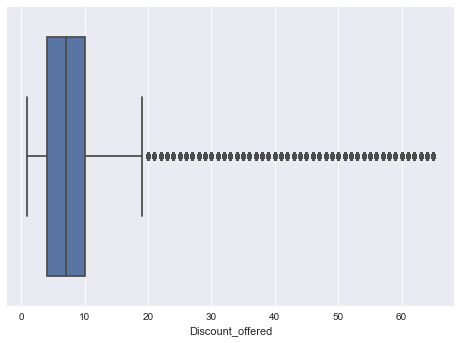

In [12]:
sns.boxplot(data['Discount_offered'])

In [13]:
data['Discount_offered'].nunique()

65

<AxesSubplot:xlabel='Prior_purchases'>

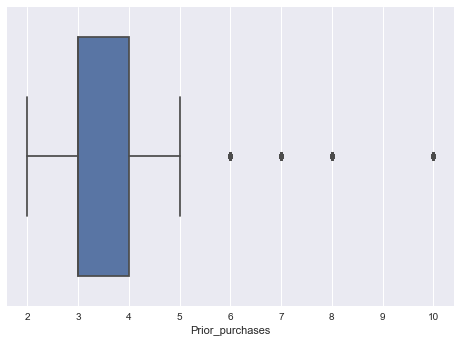

In [14]:
sns.boxplot(data['Prior_purchases'])

In [15]:
data['Prior_purchases'].nunique()

8

### Detecting & Handling Duplicates Values

In [16]:
data.duplicated().any()

False

### Detecting & Handling Imbalance Data

In [17]:
data['Reached_on_time'].value_counts()

1    6563
0    4436
Name: Reached_on_time, dtype: int64

<AxesSubplot:>

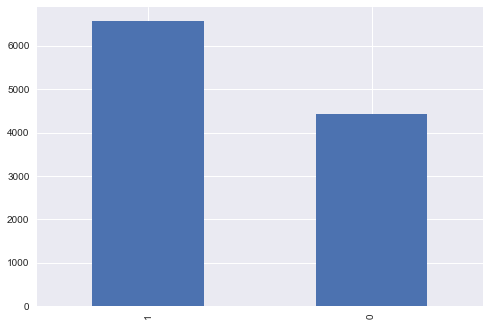

In [18]:
data['Reached_on_time'].value_counts().plot(kind='bar')

## Exploratory Data Analysis (EDA)

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached_on_time      10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


In [20]:
data.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached_on_time
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [21]:
data.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_time
0,D,Flight,4,2,177,3,low,F,44,1233,1
1,F,Flight,4,5,216,2,low,M,59,3088,1
2,A,Flight,2,2,183,4,low,M,48,3374,1
3,B,Flight,3,3,176,4,medium,M,10,1177,1
4,C,Flight,2,2,184,3,medium,F,46,2484,1


In [22]:
data.shape

(10999, 11)

In [23]:
data['Reached_on_time'].value_counts()

1    6563
0    4436
Name: Reached_on_time, dtype: int64

In [24]:
for column in data.columns:
    print('Count unique data of {} : {}'.format(column,data[column].nunique()))

Count unique data of Warehouse_block : 5
Count unique data of Mode_of_Shipment : 3
Count unique data of Customer_care_calls : 6
Count unique data of Customer_rating : 5
Count unique data of Cost_of_the_Product : 215
Count unique data of Prior_purchases : 8
Count unique data of Product_importance : 3
Count unique data of Gender : 2
Count unique data of Discount_offered : 65
Count unique data of Weight_in_gms : 4034
Count unique data of Reached_on_time : 2


In [25]:
numerical = []
categorical = []

for column in data.columns:
    if data[column].nunique() > 10:
        numerical.append(column)
    else:
        categorical.append(column)

print('numerical : ', numerical)
print()
print('categorical: ', categorical)


numerical :  ['Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']

categorical:  ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Prior_purchases', 'Product_importance', 'Gender', 'Reached_on_time']


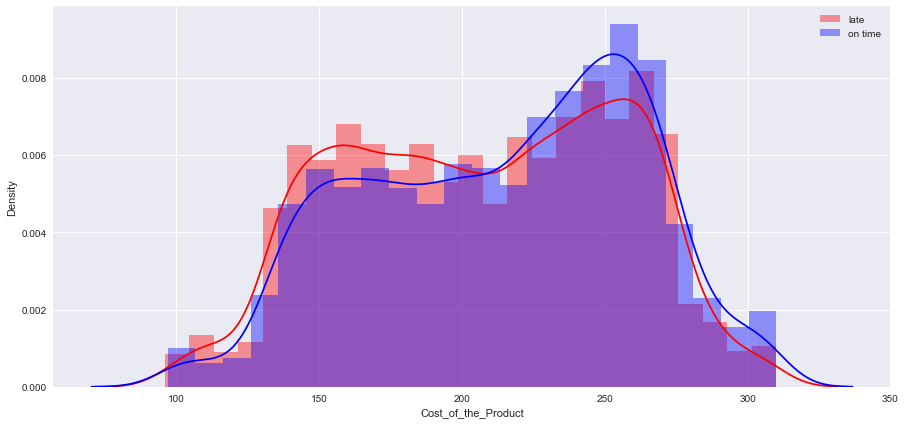

In [26]:
plt.figure(figsize=(15,7))
sns.distplot(data.Cost_of_the_Product[data['Reached_on_time'] == 1],color='r',label='late')
sns.distplot(data.Cost_of_the_Product[data['Reached_on_time'] == 0],color='b', label='on time')
plt.legend()

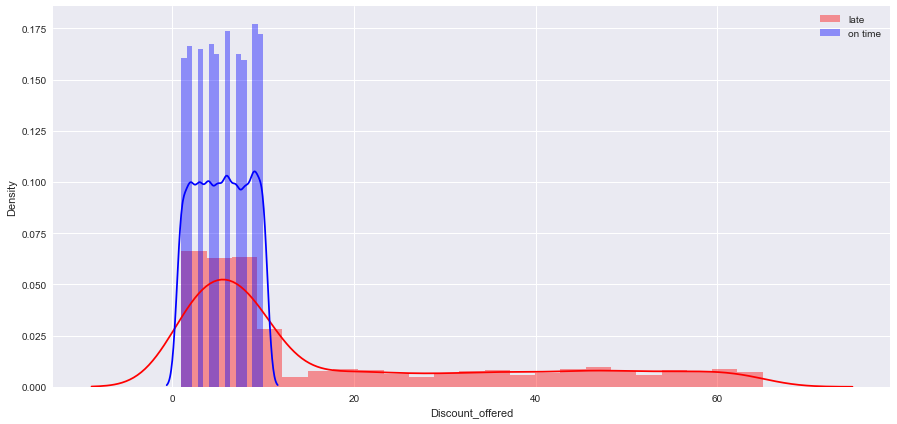

In [27]:
plt.figure(figsize=(15,7))
sns.distplot(data.Discount_offered[data['Reached_on_time'] == 1],color='r',label='late')
sns.distplot(data.Discount_offered[data['Reached_on_time'] == 0],color='b', label='on time')
plt.legend()

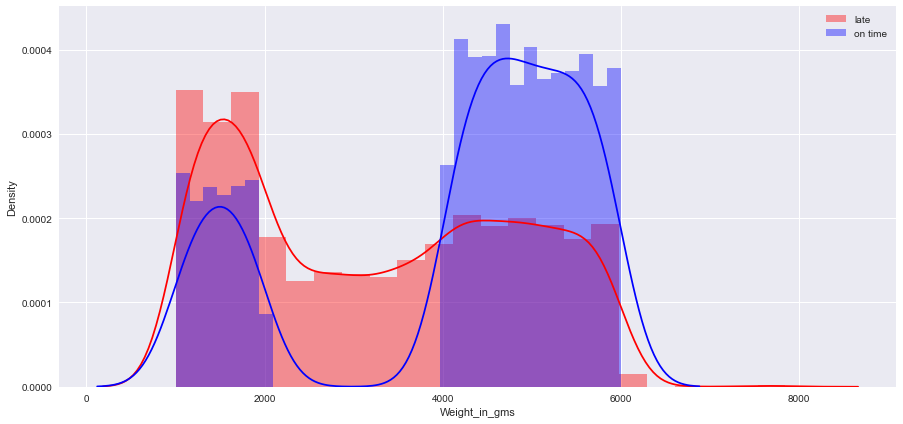

In [28]:
plt.figure(figsize=(15,7))
sns.distplot(data.Weight_in_gms[data['Reached_on_time'] == 1],color='r',label='late')
sns.distplot(data.Weight_in_gms[data['Reached_on_time'] == 0],color='b', label='on time')
plt.legend()

In [3]:
# cek berat produk 2000 - 4000

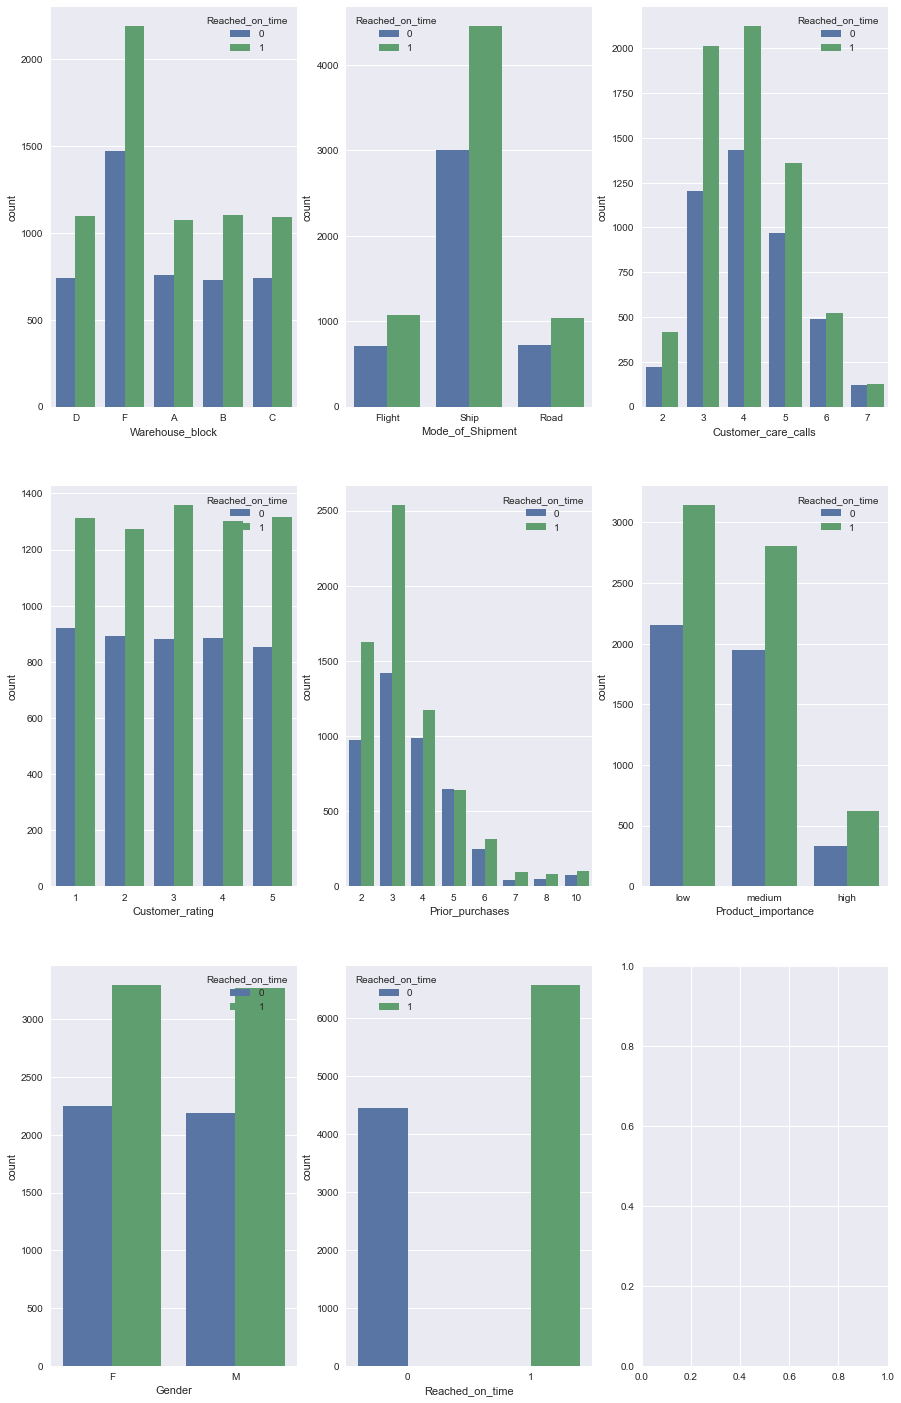

In [29]:
fig, ax = plt.subplots(3,3,figsize=(15,25))

for var, ax in zip(categorical,ax.flatten()):
    sns.countplot(var, data=data, hue='Reached_on_time', ax=ax)

In [30]:
data.corr()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached_on_time
Customer_care_calls,1.000000,0.012209,0.323182,0.180771,-0.130750,-0.276615,-0.067126
Customer_rating,0.012209,1.000000,0.009270,0.013179,-0.003124,-0.001897,0.013119
Cost_of_the_Product,0.323182,0.009270,1.000000,0.123676,-0.138312,-0.132604,-0.073587
Prior_purchases,0.180771,0.013179,0.123676,1.000000,-0.082769,-0.168213,-0.055515
Discount_offered,-0.130750,-0.003124,-0.138312,-0.082769,1.000000,-0.376067,0.397108
Weight_in_gms,-0.276615,-0.001897,-0.132604,-0.168213,-0.376067,1.000000,-0.268793
Reached_on_time,-0.067126,0.013119,-0.073587,-0.055515,0.397108,-0.268793,1.000000


<AxesSubplot:>

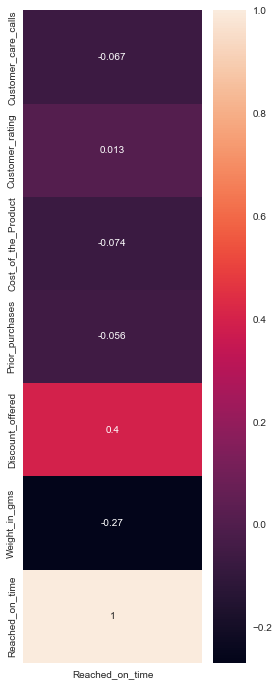

In [31]:
plt.figure(figsize=(4,12))
sns.heatmap(data.corr()[['Reached_on_time']], annot=True)

# Data Preparation

### Encoding

In [32]:
encode_columns = list(data.select_dtypes('object').columns)
encode_le = []
encode_ohe = []

In [33]:
for column in encode_columns:
    if data[column].nunique() > 2:
        encode_ohe.append(column)
    else:
        encode_le.append(column)

In [34]:
print(encode_le)
print(encode_ohe)

['Gender']
['Warehouse_block', 'Mode_of_Shipment', 'Product_importance']


In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in encode_le:
    data[column] = le.fit_transform(data[column])

In [36]:
data = pd.get_dummies(data, columns=encode_ohe)

In [37]:
data.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Reached_on_time,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium
0,4,2,177,3,0,44,1233,1,0,0,0,1,0,1,0,0,0,1,0
1,4,5,216,2,1,59,3088,1,0,0,0,0,1,1,0,0,0,1,0
2,2,2,183,4,1,48,3374,1,1,0,0,0,0,1,0,0,0,1,0
3,3,3,176,4,1,10,1177,1,0,1,0,0,0,1,0,0,0,0,1
4,2,2,184,3,0,46,2484,1,0,0,1,0,0,1,0,0,0,0,1


In [4]:
#scaling dilakukan untuk model yang berbasis jarak saja

## Normalization

In [38]:
from sklearn import preprocessing
names = data.columns
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Reached_on_time,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium
0,0.4,0.25,0.378505,0.125,0.0,0.671875,0.033893,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.4,1.00,0.560748,0.000,1.0,0.906250,0.304894,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.25,0.406542,0.250,1.0,0.734375,0.346676,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.2,0.50,0.373832,0.250,1.0,0.140625,0.025712,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.25,0.411215,0.125,0.0,0.703125,0.216654,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## Standardization

In [39]:
from sklearn import preprocessing
names = data.columns
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Reached_on_time,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium
0,-0.047711,-0.700755,-0.690722,-0.372735,-0.991760,1.889983,-1.468240,0.822138,-0.447189,-0.447189,-0.447189,2.235458,-0.707059,2.278079,-0.436459,-1.45248,-0.307114,1.037525,-0.872496
1,-0.047711,1.421578,0.120746,-1.029424,1.008308,2.815636,-0.333893,0.822138,-0.447189,-0.447189,-0.447189,-0.447336,1.414310,2.278079,-0.436459,-1.45248,-0.307114,1.037525,-0.872496
2,-1.799887,-0.700755,-0.565881,0.283954,1.008308,2.136824,-0.159002,0.822138,2.236190,-0.447189,-0.447189,-0.447336,-0.707059,2.278079,-0.436459,-1.45248,-0.307114,1.037525,-0.872496
3,-0.923799,0.006689,-0.711529,0.283954,1.008308,-0.208162,-1.502484,0.822138,-0.447189,2.236190,-0.447189,-0.447336,-0.707059,2.278079,-0.436459,-1.45248,-0.307114,-0.963832,1.146137
4,-1.799887,-0.700755,-0.545074,-0.372735,-0.991760,2.013404,-0.703244,0.822138,-0.447189,-0.447189,2.236190,-0.447336,-0.707059,2.278079,-0.436459,-1.45248,-0.307114,-0.963832,1.146137


# Model & Evaluation

In [40]:
data.head()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Reached_on_time,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium
0,4,2,177,3,0,44,1233,1,0,0,0,1,0,1,0,0,0,1,0
1,4,5,216,2,1,59,3088,1,0,0,0,0,1,1,0,0,0,1,0
2,2,2,183,4,1,48,3374,1,1,0,0,0,0,1,0,0,0,1,0
3,3,3,176,4,1,10,1177,1,0,1,0,0,0,1,0,0,0,0,1
4,2,2,184,3,0,46,2484,1,0,0,1,0,0,1,0,0,0,0,1


In [41]:
x = data.drop(['Reached_on_time'], axis=1) # features
y = data['Reached_on_time'] # target

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [43]:
# import model Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='gini', random_state=42)

# modelling
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [44]:
y_pred = model.predict(x_test)

In [45]:
# bandingkan data actual dan prediksi
compare = pd.DataFrame({
    'Actual' : y_test,
    'Prediction' : y_pred
}).reset_index()
compare

,index,Actual,Prediction
0,107,1,1
1,5594,1,1
2,6997,0,1
3,3984,0,0
4,3111,1,1
...,...,...,...
2195,6885,0,0
2196,3909,0,1
2197,10548,1,0
2198,10317,1,1


## Evaluation

In [46]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [47]:
print(confusion_matrix(y_test,y_pred))

[[512 383]
 [392 913]]


Text(0.5, 29.5, 'Prediction')

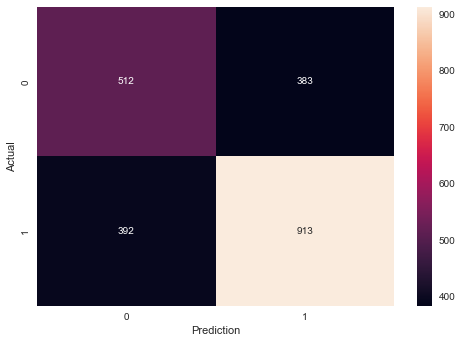

In [48]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='.3g')
plt.ylabel('Actual')
plt.xlabel('Prediction')

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.57      0.57      0.57       895
           1       0.70      0.70      0.70      1305

    accuracy                           0.65      2200
   macro avg       0.64      0.64      0.64      2200
weighted avg       0.65      0.65      0.65      2200



In [50]:
print(accuracy_score(y_test, y_pred)*100)

64.77272727272727


In [5]:
#Tuning
#gridsearchcv